In [2]:
import pandas as pd
import string
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer

stopword = nltk.corpus.stopwords.words('english')
s = nltk.PorterStemmer()

# lire data 

In [3]:
data = pd.read_excel('./ressources/Data-FakeRealCOVID.xlsx')
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


# change label 

In [4]:
data.label[data.label == 'real'] = 1
data.label[data.label == 'fake'] = 0 

C:\Users\Paragon\AppData\Local\Temp\ipykernel_2036\2324142776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.label[data.label == 'real'] = 1
C:\Users\Paragon\AppData\Local\Temp\ipykernel_2036\2324142776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.label[data.label == 'fake'] = 0


# nettoyage du texte 

In [5]:
def clean_text(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)  # removing numbers
    text = re.sub('[^a-zA-Z]' , ' ' , text)
    text = re.split('\W+', text)
    text = [w for w in text if not w.lower() in stopword]
    text = [s.stem(word) for word in text]

    return text
data['tweet'].apply(lambda x: clean_text(x))

0       [cdc, current, report, death, gener, discrep, ...
1       [state, report, death, small, rise, last, tues...
2       [polit, correct, woman, almost, use, pandem, e...
3       [indiafightscorona, covid, test, laboratori, i...
4       [popul, state, gener, larg, case, count, look,...
                              ...                        
6415    [tiger, test, posit, covid, pleas, stay, away,...
6416    [autopsi, prove, covid, blood, clot, pneumonia...
6417    [post, claim, covid, vaccin, alreadi, develop,...
6418     [aamir, khan, donat, cr, pm, relief, care, fund]
6419    [day, sinc, last, case, covid, acquir, local, ...
Name: tweet, Length: 6420, dtype: object

# vectorisation 

In [6]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(data['tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

6420 Number of tweets has 13635 words


In [7]:
vect = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
vect

c:\users\paragon\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aa,aadajoli,aaioffici,aaj,aajtak,aamaadmiparti,aamctoday,aamir,aamp,...,zone,zonecityspecif,zoo,zoodirector,zookeep,zoolog,zoom,zubymus,zydu,zyphr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6418,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# telechargement de la liste des token  

In [8]:
words=countVectorizer.get_feature_names()
with open('./ressources/words.txt', 'w') as temp_file:
    for item in words:
        temp_file.write("%s\n" % item)

c:\users\paragon\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# division des donnes

In [9]:
import numpy as np 
from sklearn.model_selection import train_test_split

In [10]:
y=data.label
x_train, x_test, y_train, y_test = train_test_split(vect, y, test_size=0.2)
x_train=np.asarray(x_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)
x_test=np.asarray(x_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

C:\Users\Paragon\AppData\Local\Temp\ipykernel_2036\2440426435.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train=np.asarray(x_train).astype(np.int)
C:\Users\Paragon\AppData\Local\Temp\ipykernel_2036\2440426435.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rel

# definition du model

In [11]:
import tensorflow as tf

In [12]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(100,activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# training du modele

In [14]:
history=model.fit(x_train, y_train, epochs=25)

Epoch 1/25
161/161 [==============================] - 3s 16ms/step - loss: 0.0190 - acc: 0.9969
Epoch 2/25
161/161 [==============================] - 2s 15ms/step - loss: 0.0106 - acc: 0.9990
Epoch 3/25
161/161 [==============================] - 2s 15ms/step - loss: 0.0065 - acc: 0.9996
Epoch 4/25
161/161 [==============================] - 2s 15ms/step - loss: 0.0044 - acc: 0.9998
Epoch 5/25
161/161 [==============================] - 3s 16ms/step - loss: 0.0031 - acc: 0.9998
Epoch 6/25
161/161 [==============================] - 3s 16ms/step - loss: 0.0023 - acc: 1.0000
Epoch 7/25
161/161 [==============================] - 3s 16ms/step - loss: 0.0018 - acc: 1.0000
Epoch 8/25
161/161 [==============================] - 3s 16ms/step - loss: 0.0014 - acc: 1.0000
Epoch 9/25
161/161 [==============================] - 2s 15ms/step - loss: 0.0011 - acc: 1.0000
Epoch 10/25
161/161 [==============================] - 2s 15ms/step - loss: 9.1620e-04 - acc: 1.0000
Epoch 11/25
161/161 [==============

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1363600   
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,363,701
Trainable params: 1,363,701
Non-trainable params: 0
_________________________________________________________________


# evaluation du model 

In [16]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 91.822428


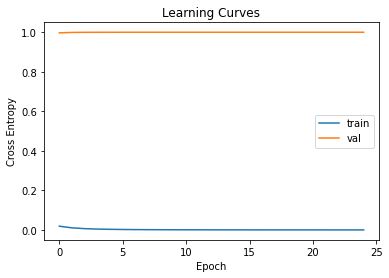

In [18]:
from matplotlib import pyplot

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['acc'], label='val')
pyplot.legend()
pyplot.show()

# sauvgarde du model

In [44]:
model.save('./ressources/model')

INFO:tensorflow:Assets written to: ./ressources/model\assets


# utilisation du model

In [19]:
def vect_sent(tweet, words):
    
    tweet_word = clean_text(tweet)
   
    bag = [0]*len(words)  
    for s in tweet_word:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
    
    
    a_predire=[]
    a_predire.append(np.array(bag))
    return(a_predire)

In [23]:
tweet='The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'

a_predire=vect_sent(tweet,words)

a_predire=np.asarray(a_predire).astype(np.int)

result=model.predict(a_predire)
if 0.9<result[0][0] :
    print('real')
else :
    print('Fake')

real


C:\Users\Paragon\AppData\Local\Temp\ipykernel_2036\1078005956.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a_predire=np.asarray(a_predire).astype(np.int)
